# **AUC ROC Curve for logistic Regression on imbalanced data**

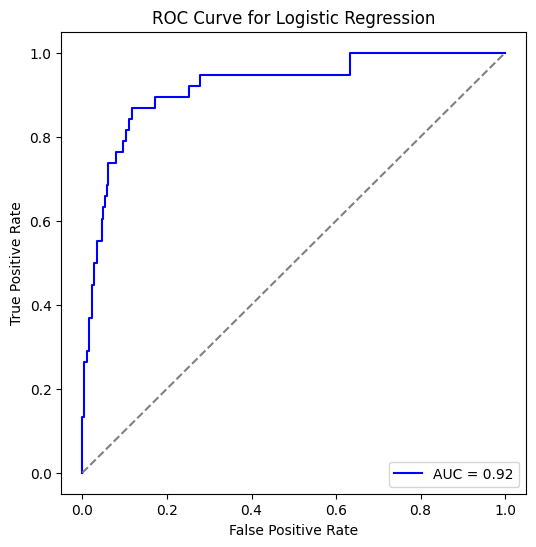

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

# Generate synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.9, 0.1], random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()



# **Log Normalization**

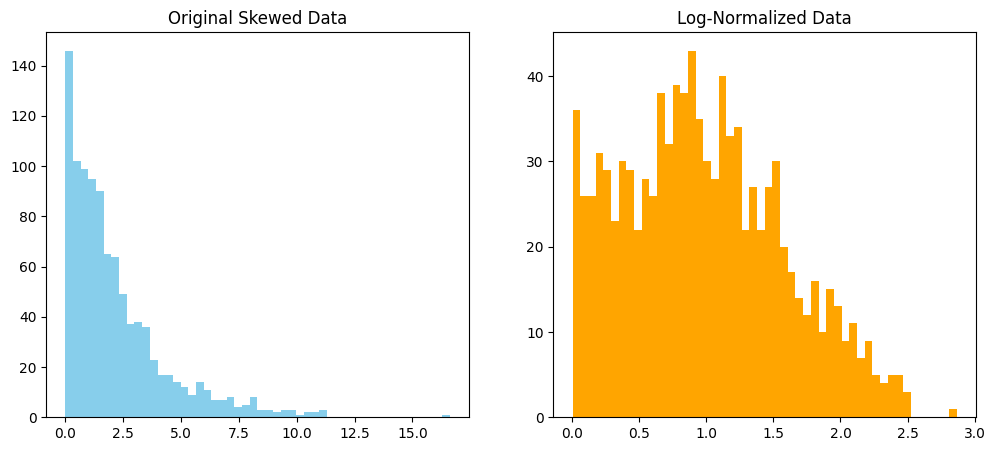

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate skewed data
data = np.random.exponential(scale=2, size=1000)

# Apply log transformation
log_data = np.log1p(data)  # log(x + 1) to handle zero values

# Plot original vs log-transformed data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(data, bins=50, color='skyblue')
plt.title("Original Skewed Data")

plt.subplot(1, 2, 2)
plt.hist(log_data, bins=50, color='orange')
plt.title("Log-Normalized Data")

plt.show()



# **One Hot Encoding**

In [12]:
'''
Use pd.get_dummies() if you're quickly analyzing data in a DataFrame.
Use OneHotEncoder() if you're working in a machine learning pipeline (e.g., sklearn models).
'''



import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample data with colors
data = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green', 'Yellow']})
print(data)
onehotencoded_df=pd.get_dummies(data)
print(onehotencoded_df)

# to avoid Dummy variable trap
onehotencoded_df1=pd.get_dummies(data,drop_first=True)
print(onehotencoded_df1)


    Color
0     Red
1    Blue
2   Green
3    Blue
4     Red
5   Green
6  Yellow
   Color_Blue  Color_Green  Color_Red  Color_Yellow
0       False        False       True         False
1        True        False      False         False
2       False         True      False         False
3        True        False      False         False
4       False        False       True         False
5       False         True      False         False
6       False        False      False          True
   Color_Green  Color_Red  Color_Yellow
0        False       True         False
1        False      False         False
2         True      False         False
3        False      False         False
4        False       True         False
5         True      False         False
6        False      False          True


In [17]:
# using OneHotEncoder()

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample data with colors
data = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green', 'Yellow']})

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse=False returns a dense array

# Apply encoding
encoded_array = encoder.fit_transform(data[['Color']])

# Convert to DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Color']))

# Combine with original data
result = pd.concat([data, encoded_df], axis=1)

# Print the result
result


Color  Color_Blue  Color_Green  Color_Red  Color_Yellow
0     Red         0.0          0.0        1.0           0.0
1    Blue         1.0          0.0        0.0           0.0
2   Green         0.0          1.0        0.0           0.0
3    Blue         1.0          0.0        0.0           0.0
4     Red         0.0          0.0        1.0           0.0
5   Green         0.0          1.0        0.0           0.0
6  Yellow         0.0          0.0        0.0           1.0

# **Label Encoding**

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data with an ordinal feature (Size)
data = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small', 'Large', 'Small']})

# Define custom order for ordinal categories
size_order = ['Small', 'Medium', 'Large']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply encoding (manual order handling)
data['Size_Encoded'] = data['Size'].apply(lambda x: size_order.index(x))

# Print the result
data


Size  Size_Encoded
0   Small             0
1  Medium             1
2   Large             2
3  Medium             1
4   Small             0
5   Large             2
6   Small             0

# **Data Imputation**

In [25]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Creating the dataset
data = {
    "ID": [1, 2, 3, 4, 5 , 6 ,7],
    "Age": [25, np.nan, 35, 40,np.nan,50,60],
    "Salary": [50000, 60000, 55000, 65000,np.nan,np.nan, 40000]
}
df = pd.DataFrame(data)
print(df)

# Mean Imputation
df_mean = df.copy()
df_mean["Age"].fillna(df_mean["Age"].mean(), inplace=True)
df_mean["Salary"].fillna(df_mean["Salary"].mean(), inplace=True)
print("\nMean Imputation:\n", df_mean)


# KNN Imputation (k=2)
imputer = KNNImputer(n_neighbors=2)
df_knn = df.copy()
df_knn.iloc[:, 1:] = imputer.fit_transform(df_knn.iloc[:, 1:])
print("\nKNN Imputation:\n", df_knn)


   ID   Age   Salary
0   1  25.0  50000.0
1   2   NaN  60000.0
2   3  35.0  55000.0
3   4  40.0  65000.0
4   5   NaN      NaN
5   6  50.0      NaN
6   7  60.0  40000.0

Mean Imputation:
    ID   Age   Salary
0   1  25.0  50000.0
1   2  42.0  60000.0
2   3  35.0  55000.0
3   4  40.0  65000.0
4   5  42.0  54000.0
5   6  50.0  54000.0
6   7  60.0  40000.0

KNN Imputation:
    ID   Age   Salary
0   1  25.0  50000.0
1   2  37.5  60000.0
2   3  35.0  55000.0
3   4  40.0  65000.0
4   5  42.0  54000.0
5   6  50.0  52500.0
6   7  60.0  40000.0


<ipython-input-25-50da872667b7>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean["Age"].fillna(df_mean["Age"].mean(), inplace=True)
<ipython-input-25-50da872667b7>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True